# Model Evaluation
## Compare the General Model's Performance on Boston Celtics specifically vs. Model Trained on Boston Celtics Data Alone

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [6]:
bos_general = pd.read_csv('gen_model_boston_celtics_eval.csv')
bos_specific = pd.read_csv('boston_celtics_model_eval.csv')

# Calculate the difference between Actual PTS and Predicted PTS
bos_general['Point Diff'] = bos_general['Actual PTS'] - bos_general['Predicted PTS']
bos_specific['Point Diff'] = bos_specific['Actual PTS'] - bos_specific['Predicted PTS']

# Descriptive Statistics for Point Differences
gen_mean = bos_general['Point Diff'].mean()
gen_median = bos_general['Point Diff'].median()
gen_std = bos_general['Point Diff'].std()
gen_min = bos_general['Point Diff'].min()
gen_max = bos_general['Point Diff'].max()

bos_mean = bos_specific['Point Diff'].mean()
bos_median = bos_specific['Point Diff'].median()
bos_std = bos_specific['Point Diff'].std()
bos_min = bos_specific['Point Diff'].min()
bos_max = bos_specific['Point Diff'].max()

print("--- General Model Descriptive Statistics ---")
print(f"Mean: {gen_mean:.2f}, Median: {gen_median:.2f}, Std Dev: {gen_std:.2f}, Range: ({gen_min:.2f}, {gen_max:.2f})")
print("\n--- Celtics-Specific Model Descriptive Statistics ---")
print(f"Mean: {bos_mean:.2f}, Median: {bos_median:.2f}, Std Dev: {bos_std:.2f}, Range: ({bos_min:.2f}, {bos_max:.2f})")

# Paired t-test
t_stat, p_value = stats.ttest_rel(bos_general['Point Diff'], bos_specific['Point Diff'])

print("\n--- Paired t-test ---")
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")


--- General Model Descriptive Statistics ---
Mean: 4.56, Median: 4.45, Std Dev: 9.69, Range: (-14.47, 27.69)

--- Celtics-Specific Model Descriptive Statistics ---
Mean: 15.38, Median: 13.03, Std Dev: 25.98, Range: (-45.05, 74.89)

--- Paired t-test ---
t-statistic: -3.96, p-value: 0.0002


### Comparison of General Model vs. Celtics-Specific Model Performance

#### Descriptive Statistics for Point Differences
- **General Model**
  - Mean Difference: 4.56
  - Median Difference: 4.45
  - Standard Deviation: 9.69
  - Range: (-14.47, 27.69)

- **Celtics-Specific Model**
  - Mean Difference: 15.38
  - Median Difference: 13.03
  - Standard Deviation: 25.98
  - Range: (-45.05, 74.89)

#### Hypothesis Testing: Paired t-test
- **t-statistic:** -3.96  
- **p-value:** 0.0002  

#### Conclusion
- The p-value (0.0002) is less than the significance level of 0.05, indicating a statistically significant difference between the two models.
- The **general model** has a much smaller mean point difference (4.56 vs. 15.38) and lower variability (std dev: 9.69 vs. 25.98) compared to the Celtics-specific model.
- This suggests that the general model performs significantly better than the Celtics-specific model on Boston Celtics data.


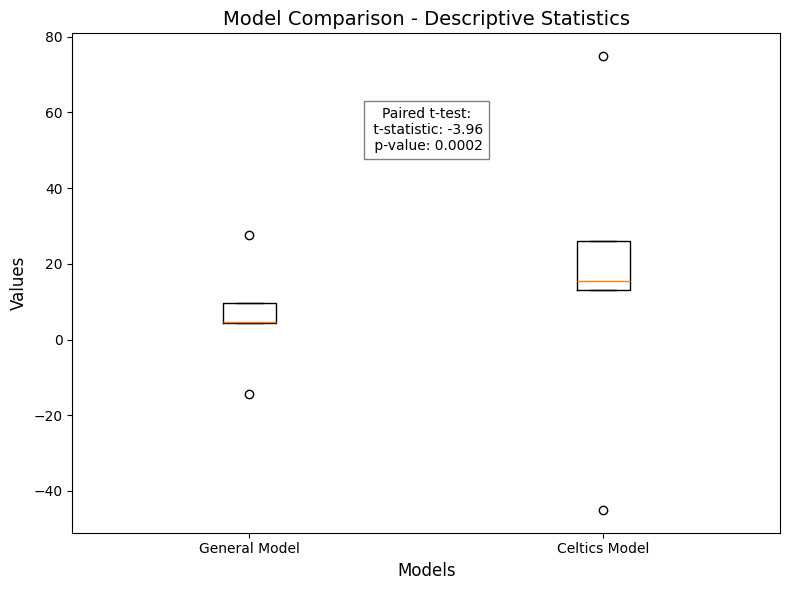

In [16]:
# Data for the boxplot
general_model_stats = [-14.47, 27.69, 4.56, 4.45, 9.69]
celtics_model_stats = [-45.05, 74.89, 15.38, 13.03, 25.98]

# Create the boxplot
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot([general_model_stats, celtics_model_stats], tick_labels=['General Model', 'Celtics Model'])

# Add titles and labels
ax.set_title('Model Comparison - Descriptive Statistics', fontsize=14)
ax.set_ylabel('Values', fontsize=12)
ax.set_xlabel('Models', fontsize=12)

# Annotate paired t-test result
t_test_text = "Paired t-test:\n t-statistic: -3.96\n p-value: 0.0002"
plt.text(1.5, 50, t_test_text, ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Show the plot
plt.tight_layout()

# Save the figure
plt.savefig('model_comparison_boxplot.png', dpi=300, bbox_inches='tight')

plt.show()